### K-means clustering

An unsupervised learning algorithm which means you take unlabelled data and put them in clusters (based on their characteristics) as name suggests. 
Data or objects similar in characteristics or nature are put together in groups or clusters. 

K denotes the number of clusters to be formed. For example k=2 means there will be 2 clusters.

How it works:
- Initially two centroids are assigned randomly.
- The Euclidean Distance is used to find out which centroid is closest to each data point and data points are assigned to coresponding centroids.
- The process is iteratively repeated until our centroid is actual central point of cluster and becomes static

Euclidean distance can be calculated using:

\(d=\sqrt{(x_{2}-x_{1})^{2}+(y_{2}-y_{1})^{2}}\).

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# makeblobs creates fake data for clustering
from sklearn.datasets import make_blobs

#cluster_std controls how spread out the clusters are
# Smaller value:tighter clusters, Larger value: more overlap

X, y_true = make_blobs(n_samples=500, centers=4,cluster_std=0.60, random_state=0)

print(X.shape)  #500 rows/data points and 2 columns/coordinates x and y 
print(y_true.shape)

(500, 2)
(500,)


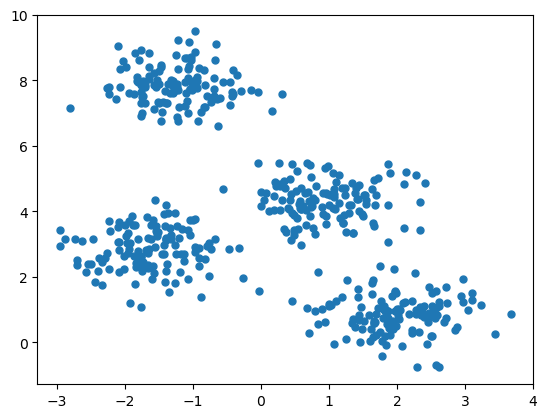

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=25)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#tells which cluster a point belongs to
#there are 4 clusters 0,1,2,3
y_kmeans

array([3, 3, 1, 1, 3, 0, 0, 1, 1, 2, 0, 3, 0, 2, 1, 1, 3, 1, 2, 1, 1, 3,
       0, 2, 1, 2, 3, 0, 2, 0, 0, 0, 3, 0, 0, 3, 2, 1, 2, 3, 2, 1, 1, 3,
       0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 1, 0, 0, 2, 2, 3, 3, 2, 3, 3, 3, 0,
       1, 3, 1, 0, 2, 1, 2, 3, 2, 3, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2,
       3, 2, 2, 2, 3, 2, 1, 1, 3, 3, 3, 1, 2, 2, 3, 2, 1, 1, 0, 3, 1, 2,
       2, 0, 2, 2, 3, 2, 3, 1, 0, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 2, 1, 2,
       0, 2, 2, 2, 1, 3, 1, 0, 3, 3, 3, 3, 0, 2, 1, 1, 0, 2, 2, 3, 1, 1,
       1, 0, 0, 3, 0, 1, 3, 1, 3, 3, 0, 0, 3, 1, 2, 0, 3, 2, 3, 0, 1, 2,
       1, 2, 2, 2, 3, 3, 3, 1, 0, 2, 0, 3, 0, 2, 3, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 3, 3, 1, 3, 0, 2, 2, 2,
       1, 3, 0, 2, 0, 3, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 3, 3, 0,
       0, 3, 2, 2, 1, 3, 1, 1, 1, 0, 3, 2, 1, 2, 2, 0, 2, 0, 1, 1, 3, 2,
       3, 3, 1, 1, 2, 3, 1, 2, 3, 0, 3, 2, 0, 0, 1, 3, 3, 1, 3, 0, 3, 0,
       0, 3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 3, 3,

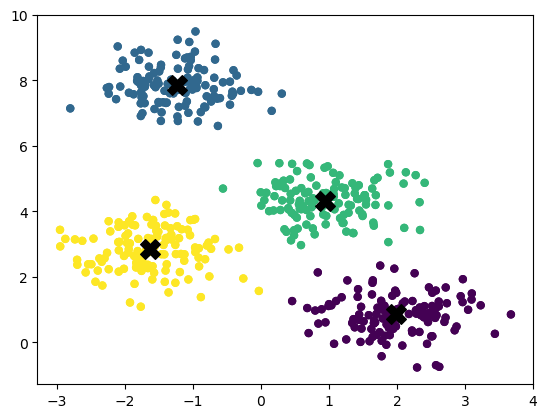

In [20]:
#Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='viridis')
#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],c='black', s=200, marker='X')
plt.show()

In [50]:
# Text clustering using k means

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Example text documents

documents = [
    "Machine learning is fascinating",
    "Deep learning is part of AI",
    "Data science uses Python",
    "Football is a popular sport",
    "Basketball requires teamwork",
    "Sports improve physical health",
    "AI models learn from data",
    "I like playing sports on weekends"
]


In [51]:
# TF-IDF converts text into numerical form
# TF-IDF assigns importance to words based on:
# how often they appear in a document and how rare they are across all documents

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# X is now a numerical matrix where each row = one document and each column = a word feature

print(X.shape)  # (6 documents, 22 word features)

(8, 29)


In [52]:
# We choose 2 clusters because we expect 2 topics
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

from sklearn.preprocessing import normalize

X_normalized = normalize(X)
kmeans.fit(X_normalized)

KMeans(n_clusters=2, random_state=0)

In [53]:
# Display clustering results
print("Text Clustering Results:\n")

for doc, label in zip(documents, labels):
    print(f"Cluster {label}: {doc}")

Text Clustering Results:

Cluster 1: Machine learning is fascinating
Cluster 1: Deep learning is part of AI
Cluster 1: Data science uses Python
Cluster 1: Football is a popular sport
Cluster 0: Basketball requires teamwork
Cluster 1: Sports improve physical health
Cluster 1: AI models learn from data
Cluster 1: I like playing sports on weekends


In [54]:
#Inspect important words in each cluster just to understand what each cluster represents

terms = vectorizer.get_feature_names_out()

print("\nTop words per cluster:\n")

for i, center in enumerate(kmeans.cluster_centers_):
    # Get indices of top words (highest weights)
    top_word_indices = center.argsort()[-5:]
    
    print(f"Cluster {i} top words:")
    print([terms[j] for j in top_word_indices])
    print()



Top words per cluster:

Cluster 0 top words:
['like', 'weekends', 'requires', 'basketball', 'teamwork']

Cluster 1 top words:
['ai', 'sports', 'data', 'learning', 'is']



In [55]:
# TF-IDF vectors might have dozens of dimensions. we can reduce high-dimensional TF-IDF vectors to 2D using PCA. This helps us visualize the data on a graph

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

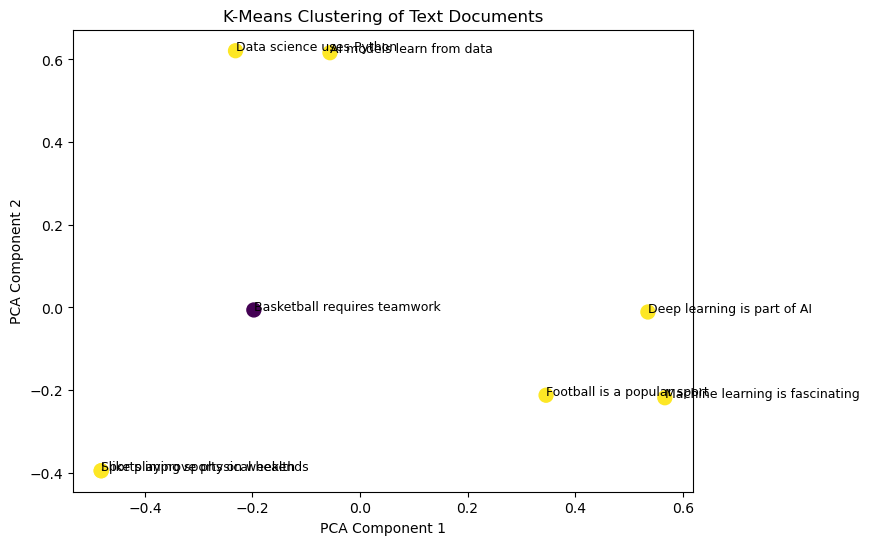

In [56]:
#One document/sentence = one point on the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0],X_2d[:, 1],c=labels,s=100,cmap='viridis')

# 7. Annotate each point with the document text
for i, text in enumerate(documents):
    plt.annotate(text, (X_2d[i, 0], X_2d[i, 1]), fontsize=9)

plt.title("K-Means Clustering of Text Documents")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()